In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

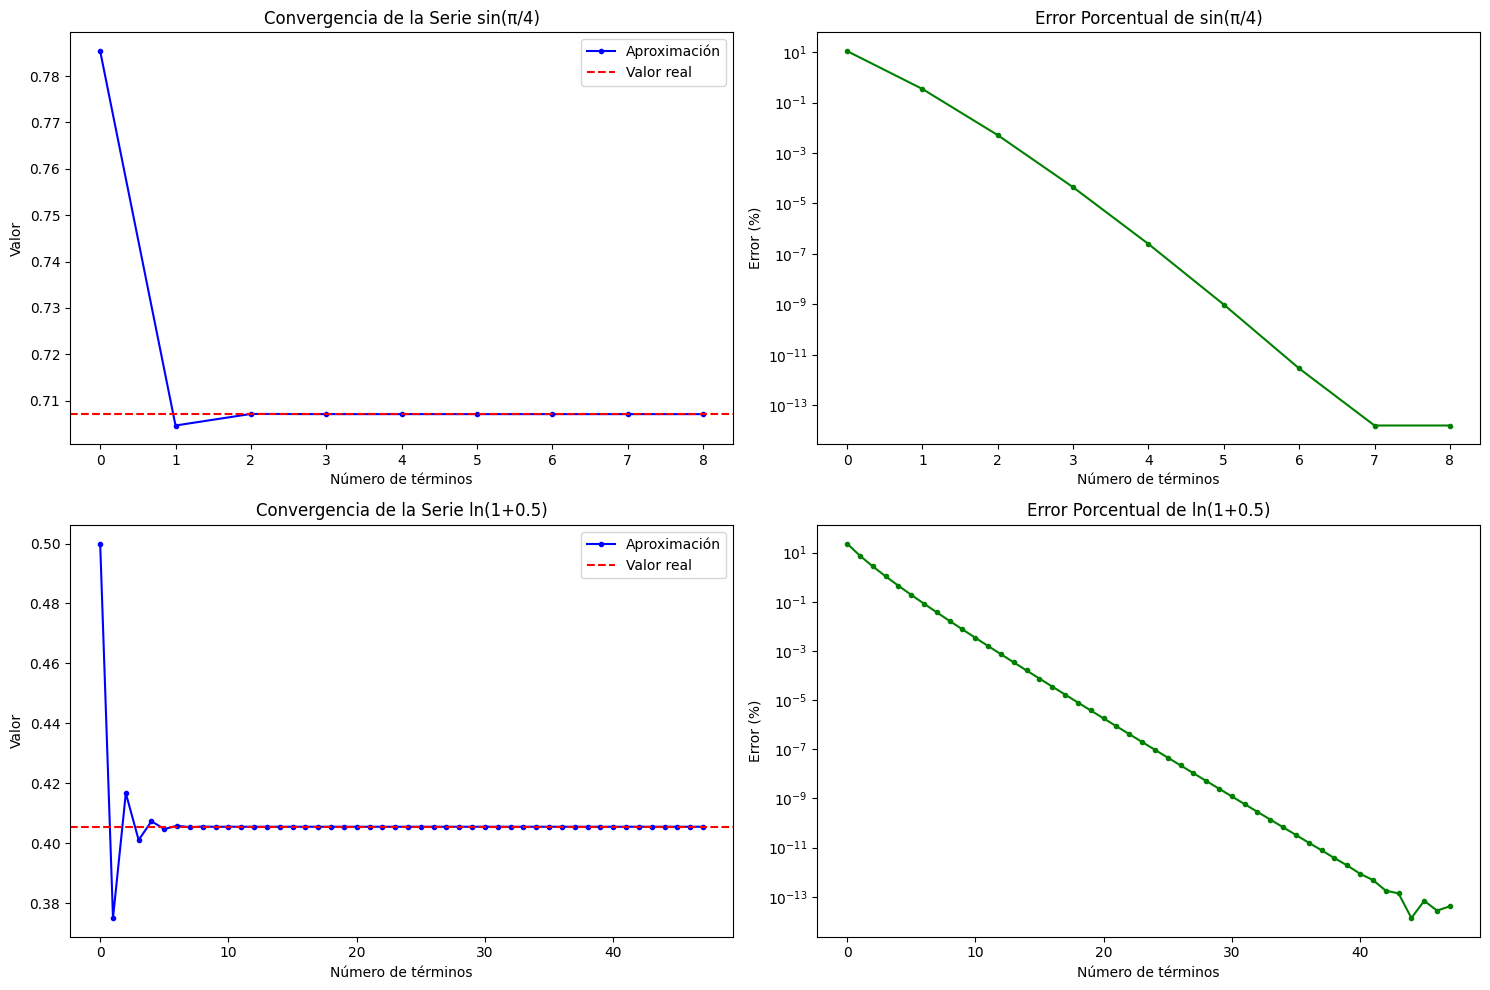

In [5]:
# Función para calcular la serie de Taylor de sin(x)
def sin_taylor(x, tolerancia=1e-16):
    termino = x
    resultado = termino
    terminos = [resultado]
    n = 1
    while abs(termino) > tolerancia:
        termino = (-1) ** n * x ** (2 * n + 1) / factorial(2 * n + 1)
        resultado += termino
        terminos.append(resultado)
        n += 1
    return terminos


# Función para calcular la serie de Taylor de ln(1+x) 
def ln_taylor(x, tolerancia=1e-16):
    termino = x
    resultado = termino
    terminos = [resultado]
    n = 2
    while abs(termino) > tolerancia:
        termino = (-1) ** (n - 1) * x ** n / n
        resultado += termino
        terminos.append(resultado)
        n += 1
    return terminos


# Calcular serie para sin(π/4)
x_seno = np.pi / 4
terminos_seno = sin_taylor(x_seno)
valor_real_seno = np.sin(x_seno)

# Calcular errores relativos y porcentuales para sin(x)
errores_rel_seno = [abs((term - valor_real_seno) / valor_real_seno) for term in terminos_seno]
errores_porc_seno = [error * 100 for error in errores_rel_seno]

# Calcular serie para ln(1+0.5)
x_ln = 0.5
terminos_ln = ln_taylor(x_ln)
valor_real_ln = np.log(1 + x_ln)

# Calcular errores relativos y porcentuales para ln(1+x)
errores_rel_ln = [abs((term - valor_real_ln) / valor_real_ln) for term in terminos_ln]
errores_porc_ln = [error * 100 for error in errores_rel_ln]

# Gráficas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Gráfica de convergencia de sin(x)
ax1.plot(terminos_seno, 'b.-', label='Aproximación')
ax1.axhline(y=valor_real_seno, color='r', linestyle='--', label='Valor real')
ax1.set_title('Convergencia de la Serie sin(π/4)')
ax1.set_xlabel('Número de términos')
ax1.set_ylabel('Valor')
ax1.legend()

# Gráfica de errores de sin(x)
ax2.semilogy(errores_porc_seno, 'g.-')
ax2.set_title('Error Porcentual de sin(π/4)')
ax2.set_xlabel('Número de términos')
ax2.set_ylabel('Error (%)')

# Gráfica de convergencia de ln(1+x)
ax3.plot(terminos_ln, 'b.-', label='Aproximación')
ax3.axhline(y=valor_real_ln, color='r', linestyle='--', label='Valor real')
ax3.set_title('Convergencia de la Serie ln(1+0.5)')
ax3.set_xlabel('Número de términos')
ax3.set_ylabel('Valor')
ax3.legend()

# Gráfica de errores de ln(1+x)
ax4.semilogy(errores_porc_ln, 'g.-')
ax4.set_title('Error Porcentual de ln(1+0.5)')
ax4.set_xlabel('Número de términos')
ax4.set_ylabel('Error (%)')

plt.tight_layout()
plt.show()


# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



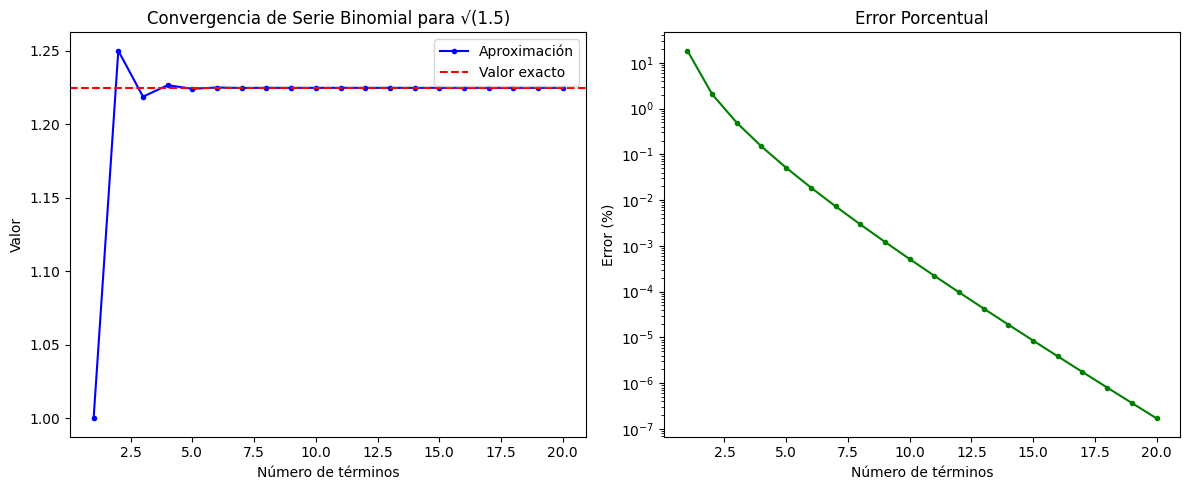

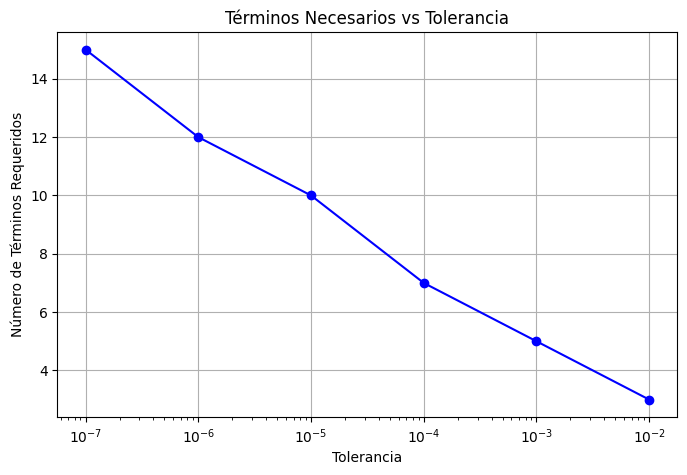

In [5]:
# Función para calcular coeficiente binomial
def coeficiente_binomial(alfa, n):
    coef = 1
    for i in range(n):
        coef *= (alfa - i) / (i + 1)
    return coef


# Función para calcular raíz cuadrada(1+x) usando serie binomial
def raiz_binomial(x, n_terminos):
    resultado = 0
    for n in range(n_terminos):
        resultado += coeficiente_binomial(0.5, n) * (x ** n)
    return resultado


# Calcular valor exacto
x = 0.5
valor_exacto = np.sqrt(1 + x)

# Calcular aproximaciones con diferente número de términos
max_terminos = 20
terminos = list(range(1, max_terminos + 1))
aproximaciones = [raiz_binomial(x, n) for n in terminos]

# Calcular errores
errores_rel = [abs((aprox - valor_exacto) / valor_exacto) for aprox in aproximaciones]
errores_porc = [error * 100 for error in errores_rel]

# Gráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica de convergencia
ax1.plot(terminos, aproximaciones, 'b.-', label='Aproximación')
ax1.axhline(y=valor_exacto, color='r', linestyle='--', label='Valor exacto')
ax1.set_title('Convergencia de Serie Binomial para √(1.5)')
ax1.set_xlabel('Número de términos')
ax1.set_ylabel('Valor')
ax1.legend()

# Gráfica de error porcentual
ax2.semilogy(terminos, errores_porc, 'g.-')
ax2.set_title('Error Porcentual')
ax2.set_xlabel('Número de términos')
ax2.set_ylabel('Error (%)')

plt.tight_layout()
plt.show()

# Probar diferentes valores de tolerancia
tolerancias = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
terminos_necesarios = []

for tolerancia in tolerancias:
    n = 1
    while abs((raiz_binomial(x, n) - valor_exacto) / valor_exacto) > tolerancia:
        n += 1
    terminos_necesarios.append(n)

# Gráfica de términos necesarios vs tolerancia
plt.figure(figsize=(8, 5))
plt.semilogx(tolerancias, terminos_necesarios, 'bo-')
plt.title('Términos Necesarios vs Tolerancia')
plt.xlabel('Tolerancia')
plt.ylabel('Número de Términos Requeridos')
plt.grid(True)
plt.show()
